# Part 4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib as mplib
import matplotlib.pyplot as plt
import seaborn as sns
import PandaSurvey
import weightedcalcs as wc

# Importing Dataset with Total NYC Population

In [2]:
df = pd.read_csv('/Data/004usa_00005.csv')

## Weighting Dataframe for Plotting Medicaid vs Non-Medicaid New Yorkers

In [20]:
weighted_df = df.groupby(['YEAR', 'HINSCAID'], as_index=False).sum()[['YEAR', 'HINSCAID', 'PERWT']]

## Plotting Medicaid vs Non-Medicaid New Yorkers

Recoding 'HINSCAID' Column

In [38]:
df['HINSCAID'].replace({1: 'Does not have Medicaid', 2: 'Has Medicaid'}, inplace=True)

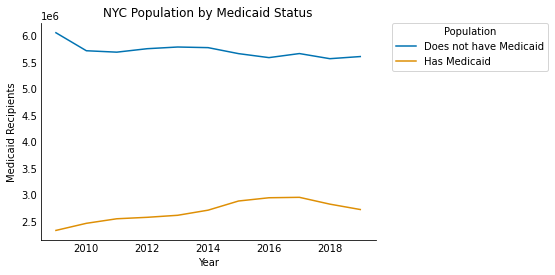

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = sns.lineplot(x='YEAR', y='PERWT', hue='HINSCAID', data=weighted_df, palette=sns.color_palette('colorblind', n_colors=2))
sns.despine()
y.set(xlabel='Year', ylabel='Medicaid Recipients', title='NYC Population by Medicaid Status')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Population')
plt.savefig('NYC Population by Medicaid Status.png', bbox_inches='tight')

## Weighting Dataframe for Plotting Medicaid vs Non-Medicaid New Yorkers by Borough

In [40]:
weighted = df.groupby(['YEAR', 'HINSCAID', 'COUNTYICP'], as_index=False).sum()[['YEAR', 'HINSCAID', 'COUNTYICP', 'PERWT']]

Recoding 'COUNTYICP' Column

In [41]:
weighted['COUNTYICP'].replace({50: 'Bronx', 470: 'Brooklyn', 610: 'Manhattan', 810: 
                         'Queens', 850:'Staten Island'}, inplace=True)

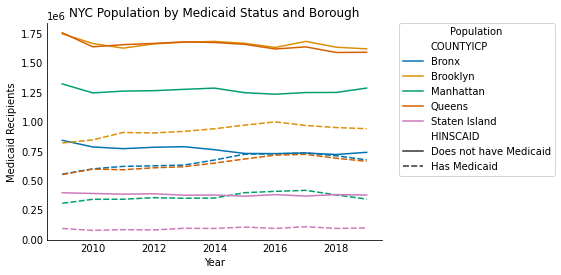

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)
y = sns.lineplot(x='YEAR', y='PERWT', hue='COUNTYICP', style='HINSCAID', data=weighted, palette=sns.color_palette('colorblind', n_colors=5))
sns.despine()
y.set(xlabel='Year', ylabel='Medicaid Recipients', title='NYC Population by Medicaid Status and Borough')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Population')
plt.savefig('NYC Population by Medicaid Status and Borough 2009-2019.png', bbox_inches='tight')